# Primary Dataset - Linear Regression and Price Analysis using Random Forest



In [61]:
# Load necessary libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
from matplotlib import gridspec
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

sns.set()

In [62]:
# set this to either primary or secondary depending on the analysis you want to do
dataset = 'primary'

data = pd.read_csv(f'../dataset/mapped_{dataset}.csv', sep=",")
transform = pd.read_csv(f'../dataset/transform_{dataset}.csv', sep=",")
data = data.drop(columns=['uuid'])

In [63]:
import statsmodels.api as sm

X = data.loc[:, ~data.columns.isin(['price'])]
y = data["price"]

model = sm.OLS(y, X)    # Describe model

result = model.fit()       # Fit model

print(result.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                              654.9
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                        0.00
Time:                        03:17:47   Log-Likelihood:                         -27745.
No. Observations:               15214   AIC:                                  5.554e+04
Df Residuals:                   15191   BIC:                                  5.571e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [64]:
Xt = transform.loc[:, ~transform.columns.isin(['price'])]
yt = transform["price"]

modelt = sm.OLS(yt, Xt)    # Describe model

resultt = modelt.fit()       # Fit model

print(resultt.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          2.700e+04
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                        0.00
Time:                        03:17:47   Log-Likelihood:                          29964.
No. Observations:               15214   AIC:                                 -5.988e+04
Df Residuals:                   15192   BIC:                                 -5.972e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [65]:
from sklearn.metrics import mean_squared_error

y_pred = result.predict(X)
mse = mean_squared_error(y, y_pred)

fstat, pvalue = sm.stats.linear_rainbow(result)
print(f' f stat: {fstat} | p value: {pvalue} | mse: {mse}')

 f stat: 1.4061864622192486 | p value: 5.707235837274266e-50 | mse: 2.2464624841702174


In [66]:
y_predt = resultt.predict(Xt)
mset = mean_squared_error(yt, y_predt)

fstatt, pvaluet = sm.stats.linear_rainbow(resultt)
print(f' f stat: {fstatt} | p value: {pvaluet} | mse: {mset}')

 f stat: 1.309542223236456 | p value: 4.318233436136021e-32 | mse: 0.0011398375904127526


---

# Polynomial Regression Prediction

In [67]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression model and use it based on selected feature and target
def prediction(feature, target):
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
    
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression().fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_test, y_pred, mse, r2

Mean Squared Error: 1.91355490272543
R-squared: 0.35104788760622274


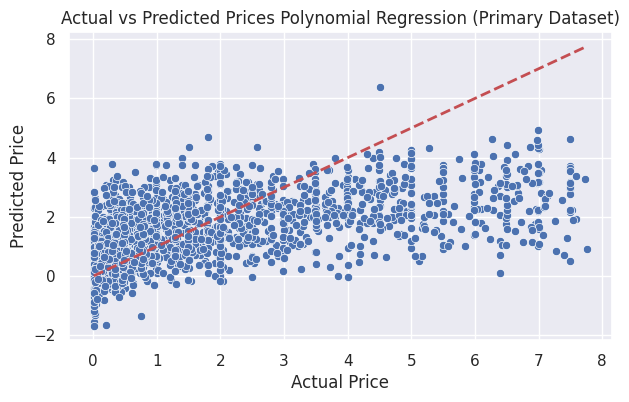

In [75]:
import statsmodels.api as sm
# Price Prediction based on Rank

X = data.loc[:, ~data.columns.isin(['price'])]
y = data["price"]

# Polinomial Linear Regression
y_test, y_pred, mse, r2 = prediction(X, y)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Ploting results

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Actual vs Predicted Prices Polynomial Regression (Primary Dataset)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Transformed Mean Squared Error: 0.00015645371327158383
Transformed R-squared: 0.9758433486702031


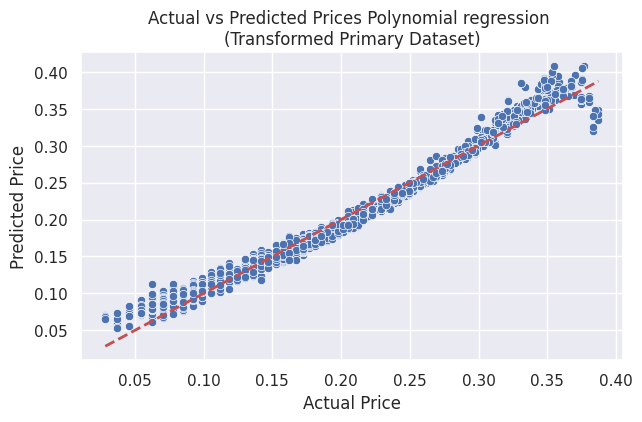

In [76]:
Xt = transform.loc[:, ~transform.columns.isin(['price'])]
yt = transform["price"]

# Polinomial Linear Regression
y_testt, y_predt, mset, r2t = prediction(Xt, yt)

print(f'Transformed Mean Squared Error: {mset}')
print(f'Transformed R-squared: {r2t}')

# Ploting results

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_testt, y=y_predt)
plt.plot([y_testt.min(), y_testt.max()], [y_testt.min(), y_testt.max()], 'r--', lw=2)
plt.title(f'Actual vs Predicted Prices Polynomial regression \n(Transformed Primary Dataset)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

---

# Random Forest implementation


In [70]:
# Random Forest implementation

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [71]:

# define features
X = data.loc[:, ~data.columns.isin(['price'])]
#convert y values to categorical values
y = data["price"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)


In [72]:
# define features
Xt = transform.loc[:, ~transform.columns.isin(['price'])]
#convert y values to categorical values
yt = transform["price"]


# Split the data into training and test sets
X_traint, X_testt, y_traint, y_testt = train_test_split(Xt, yt, test_size=0.2)


scalert = StandardScaler()
X_train_scaledt = scalert.fit_transform(X_traint)
X_test_scaledt = scalert.transform(X_testt)


rft = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaledt, y_traint)


Mean Squared Error: 0.7753397847880381
R-squared: 0.7410351685732852
             feature  importance
4         edhrecRank    0.151957
17            rarity    0.095249
12            number    0.074681
5    edhrecSaltiness    0.073812
1         cardFinish    0.060270
15     priceProvider    0.058717
13      originalType    0.058204
0             artist    0.051208
11              name    0.050712
18           setCode    0.048277
9           manaCost    0.044138
16   providerListing    0.039142
21              type    0.036199
6   gameAvailability    0.033390
10         manaValue    0.024110
20         toughness    0.022553
2      colorIdentity    0.020475
3             colors    0.018325
14             power    0.017025
7          isReprint    0.013510
8             layout    0.004747
22             types    0.002648
19        supertypes    0.000652


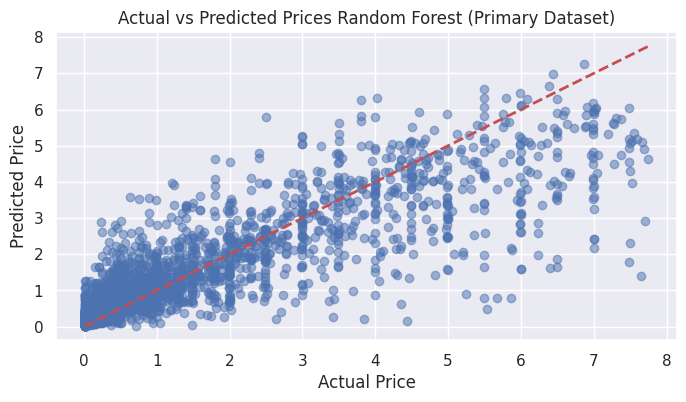

In [73]:

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)


# Visualize actual vs predicted prices
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices Random Forest (Primary Dataset)')
plt.show()


Mean Squared Error: 8.185580384175704e-10
R-squared: 0.9999998765046534
             feature    importance
4    edhrecSaltiness  9.999861e-01
8           manaCost  2.262619e-06
20              type  2.228246e-06
19         toughness  1.838576e-06
9          manaValue  1.199122e-06
3         edhrecRank  1.137642e-06
13             power  1.082453e-06
2             colors  1.034501e-06
16            rarity  8.476498e-07
10              name  7.212146e-07
12      originalType  4.918205e-07
17           setCode  4.003563e-07
0             artist  3.253511e-07
11            number  1.614810e-07
21             types  1.266552e-07
1         cardFinish  4.615628e-09
5   gameAvailability  4.198553e-09
14     priceProvider  3.143585e-09
6          isReprint  1.757209e-09
15   providerListing  1.022150e-09
7             layout  7.211011e-17
18        supertypes  3.301014e-18


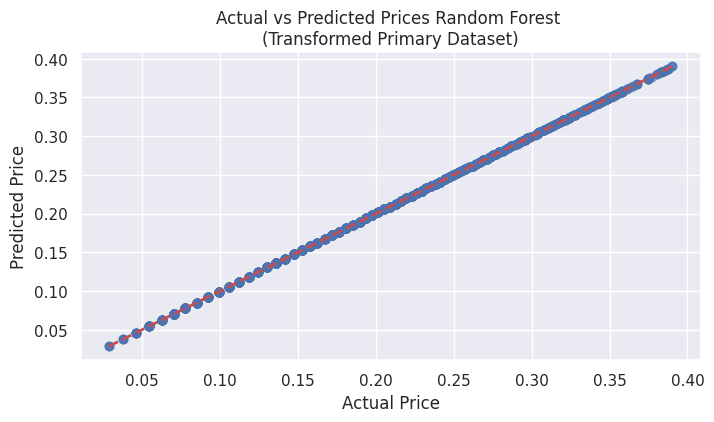

In [74]:

# Make predictions
y_predt = rft.predict(X_test_scaledt)

# Calculate metrics
mset = mean_squared_error(y_testt, y_predt)
r2t = r2_score(y_testt, y_predt)

print(f'Mean Squared Error: {mset}')
print(f'R-squared: {r2t}')

# Feature importance
feature_importancet = pd.DataFrame({'feature': Xt.columns, 'importance': rft.feature_importances_})
feature_importancet = feature_importancet.sort_values('importance', ascending=False)
print(feature_importancet)


# Visualize actual vs predicted prices
plt.figure(figsize=(8, 4))
plt.scatter(y_testt, y_predt, alpha=0.5)
plt.plot([y_testt.min(), y_testt.max()], [y_testt.min(), y_testt.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices Random Forest \n(Transformed Primary Dataset)')
plt.show()